## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


b. Use the cell below to find the number of rows in the dataset.

In [3]:
print('# rows : ',df.shape[0])

# rows :  294478


c. The number of unique users in the dataset.

In [4]:
print('# unique users : ',df.user_id.nunique())

# unique users :  290584


d. The proportion of users converted.

In [5]:
print('Proportion of users converted : ',df.converted.sum()/df.shape[0])

Proportion of users converted :  0.11965919355605512


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
length = len(df[(df['landing_page'] == 'new_page') & (df['group'] == 'treatment')])
no_match = df.shape[0] - length
print("# times new page and treatment didnt match : ",no_match)

# times new page and treatment didnt match :  149167


f. Do any of the rows have missing values?

In [7]:
df.isnull().sum() 

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

No null values for the rows

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.query('(group == "treatment" and landing_page == "new_page") or (group == "control" and landing_page == "old_page")')
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# we have a total count of 290585 rows
df2.shape[0]

290585

In [11]:
# number of unique user seems to be 1 less than the total count.
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


User_id 2893 is the only duplcate 

c. What is the row information for the repeat **user_id**? 

In [13]:
# row info for the repeated user
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.drop([2893],inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
df2.shape[0]

290584

In [16]:
# no more duplicates
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
print('Proportion of users converted : ',df2.converted.sum()/df2.shape[0])

Proportion of users converted :  0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
df_cont = df2[(df2['group'] == 'control') & (df2['converted'] == 1)]
df_cont['converted'].sum()/df2.shape[0]

0.06018569501417834

Looks like 6% of the people in control group got converted.

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
df_treat = df2[(df2['group'] == 'treatment') & (df2['converted'] == 1)]
df_treat['converted'].sum()/df2.shape[0]

0.05941139223081794

Approx. 6% of the people in control group got converted.

d. What is the probability that an individual received the new page?

In [20]:
len(df2[df2['landing_page'] == 'new_page'])/df2.shape[0]

0.5000619442226688

50% of the individuals received new page

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**
- Looking through the results obtained above, it is evident that the new treatment page doesn't seems to have an edge over the old page. Both have a convertion rate of 6%. 
- Also, i feel that the data provided is sufficient to predict the outcome for the each trerament.
    - We have the converted column showing us who converted.
    - We have the groups column showing which group got converted
    - We also have the landing_page column showing which page recieved the treatment and its convertion.
   So, I feel that data provided was sufficient to predict the asked outcome.
- And It seems like, a newer better approach should be addressed to increase the convertion count.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

- H0:  **$p_{old}$** >= **$p_{new}$**
- H1:  **$p_{old}$** < **$p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('ab_data.csv')
print(df.shape[0])
random.seed(42)
df2.head(2)

294478


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


a. What is the **conversion rate** for $p_{new}$ under the null? 

In [22]:
p_new = df2.converted.sum()/df2.shape[0]
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [23]:
p_old = df2.converted.sum()/df2.shape[0]
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [24]:
n_new = df2.query('(group == "treatment") and (landing_page == "new_page")')['user_id'].nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [25]:
n_old = df2.query('(group == "control") and (landing_page == "old_page")')['user_id'].nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
new_page_converted = np.random.choice([0, 1], size = n_new, p = [1 - p_new, p_new]).mean()
new_page_converted

0.11869107425504094

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.choice([0, 1], size = n_old, p = [1 - p_old, p_old]).mean()
old_page_converted

0.11902336274901221

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
p_diffs_sim = new_page_converted - old_page_converted
p_diffs_sim.mean()

-0.0003322884939712667

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [29]:
p_diffs=[]
for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], size = n_new, p = [1 - p_new, p_new]).mean()
    old_page_converted = np.random.choice([0, 1], size = n_old, p = [1 - p_old, p_old]).mean()
    diff = new_page_converted.mean()-old_page_converted.mean()
    p_diffs.append(diff)
    p_diffs

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

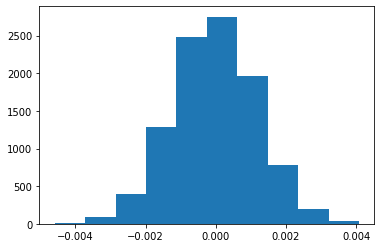

In [30]:
# plotting histogram to see how data are distributed
plt.hist(p_diffs);

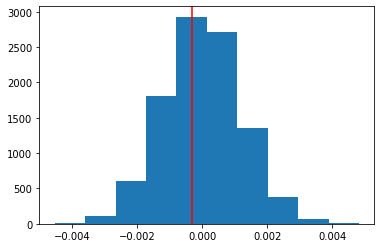

In [31]:
# creating a normal distribution to calculate the p-value
p_diffs = np.array(p_diffs)
null_vals = np.random.normal(0,np.std(p_diffs),p_diffs.size)
plt.hist(null_vals);
plt.axvline(x=p_diffs_sim.mean(),color='red');      # the redline depcits how the two means differed

In [32]:
# observed difference between the converted rate for pages thats received treatment and those that didn't from the real data
obs_diff=(df2.query('group=="treatment"')["converted"].sum()/df2.query('group=="treatment"')['user_id'].count()- (df2.query('group=="control"')["converted"].sum()/df2.query('group=="control"')['user_id'].count()))
obs_diff

-0.0015782389853555567

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
# obtaining P-value
(null_vals > obs_diff).mean()

0.9051

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

The value computed in jth question is the p-value. With alpha defined at 0.05, the derived p-value seem to be a little above it and hence making the null-hypothesis not significant and proving that there is improvement in the new changed page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
import statsmodels.api as sm
import numpy as np
convert_old = sum(df2.query('group == "control"')['converted'])
convert_new = sum(df2.query('group == "treatment"')['converted'])
n_old = 145274
n_new = 145310

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [35]:
counts = np.array([convert_old,convert_new])
nobs = np.array([n_old,n_new])
stat, pval = sm.stats.proportions_ztest(counts, nobs,alternative="smaller")
stat, pval     

(1.3109241984234394, 0.9050583127590245)

In [36]:
from scipy.stats import norm

z_p_value = norm.cdf(stat)   #checking the significane of z-score we calculated earlier.
print(z_p_value)
critical_value_conf_interval = norm.ppf(.95)    # computing the crtical value for a 95% confidence interval.
print(critical_value_conf_interval)

0.9050583127590245
1.6448536269514722


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

- The z-score value is obtained is below the critical value with 95% confidence interval, thus we can reject the null hypothesis. This implies that there were more conversions due to the chages made to the page and thus making the the alternate hypothesis significant.
- The p-value obtained is above the alpha value of 0.05 and thus clearly denying the claims made in null hypothesis.

- The findings in parts j and k do align and hence i do agree with the results from both.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

Logistic Regisression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
import statsmodels.api as sm

In [38]:
df2.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [39]:
#ab_page = [1 for item in df['group'] if item == 'treatment' ]
ab_page = []
for i in df['group']:
    if i == 'treatment':
        ab_page.append(1)
    else:
        ab_page.append(0)     

In [40]:
df2['ab_page'] = pd.Series(ab_page)

In [41]:
df2['intercept'] = 1
df2[['old_page','new_page']] = pd.get_dummies(df2['landing_page'])
df2 = df2.drop('old_page',axis=1)

In [42]:
df2.head(1)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,new_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [43]:
logit_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [44]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2020-12-21 23:23 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**

We use two-tail testing for logistic regression part in comparison to one-tailed testing for the hypothesis testing in part 2. The results obtained are:
- p-value for part2 = 0.90
- p-value for part3 = 0.19

The result shows that p-value in part3 is less the value in part2. The results differ because logistic regression uses two-tailed testing while hypothesis testing uses one-tailed testing.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

Adding more factors to predicting your output variable works just fine if that factor variable(s) have a strong correlation with the output variable that we are trying to predict. The disadvantage that could arise from adding factors is multicolinearity. This occurs when the predictor varibales show a correlation between themsleves. Downside of this effect could be like, prediction the relation completely wrong from being positive to being negative.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [45]:
df3 = pd.read_csv('countries.csv')

In [46]:
df_new = df2.join(df3.set_index('user_id'),on='user_id')
df_new.head(1)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,new_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,1,US


In [47]:
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])
df_new = df_new.drop('CA',axis=1)
df_new.head(1)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,new_page,country,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,1,US,0,1


In [48]:
logit_mod = sm.Logit(df_new['converted'],df_new[['intercept','UK','US']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [49]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.8333
Date:               2020-12-21 23:23 BIC:              212812.5723
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.19835    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

Yes the country does seem to have a postive impact on the convertion rate. For US, for every unit,keeping other factors constant, the convertion rate increased by 5%. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [50]:
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']

In [51]:
logit_mod = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','UK','UK_ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


In [52]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.7369
Date:               2020-12-21 23:23 BIC:              212824.0554
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.22779    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9876    0.0093  -213.5507  0.0000  -2.0059  -1.9694
ab_page      -0.0236    0.0132    -1.7876  0.0738  -0.0495   0.0023
UK           -0.0046    0.0186    -0.2465  0.8053  -0.0411   0.0319
UK_ab_page    0.0345    0.0264     1.3069  0.1913  -0.0172   0.0861
==================================================================

"""

- With the addition of the new interaction page column (UK_ab_page), the impact of the Country UK changed to negative, while the UK_ab_page does seem to have a positive impact of 3% increase but this is less than what we had without the interaction term.
- The impact without the country was negative, meaning there was a decrease in the convertion. With the addition of the countries, it had a postive growth. Also, the addition of interaction term did have a positve impact but was less than the countries alone.
- In conclusion, the best approach would be to perform the analysis with countries included to get the best result.